# Урок 6. Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. Корреляционный анализ.
1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

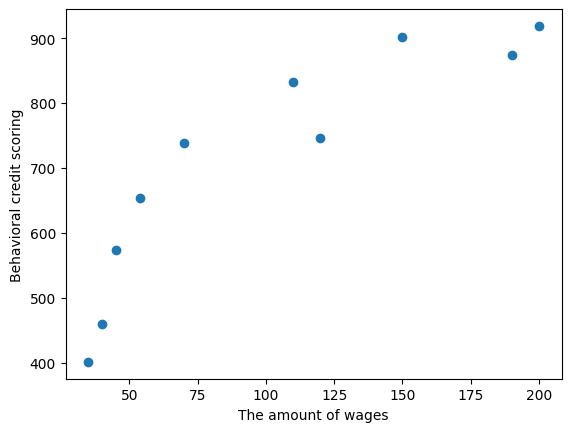

In [3]:
plt.scatter(zp, ks)
plt.xlabel('The amount of wages')
plt.ylabel('Behavioral credit scoring', rotation = 90)
plt.show()

Let's find the coefficient of covariance.

In [4]:
def covar(array1, array2):
    MXY = sum(array1*array2)/len(array1)
    MX = sum(array1)/len(array1)
    MY = sum(array2)/len(array2)
    return MXY-MX*MY

In [5]:
covar(zp, ks)

9157.839999999997

In [6]:
np.cov(zp, ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [7]:
def sigma(array, offset = True):
    mean_array = sum(array)/len(array)
    square_dev = (array-mean_array)**2
    variance = sum(square_dev)/len(array) if offset else sum(square_dev)/(len(array)-1)
    return variance**0.5

In [8]:
r = covar(zp, ks)/ (sigma(zp)*sigma(ks))
print(f'The coefficient of covariance(r) = {r:.5f}')

The coefficient of covariance(r) = 0.88749


In [12]:
r1 = np.cov(zp, ks, ddof = 1)/ (sigma(zp, offset = False)*sigma(ks, offset = False))
print(f'The coefficient of covariance(r) = {r1}')

The coefficient of covariance(r) = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


In [13]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [14]:
df = pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [15]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


There is a strong linear relationship between the input data.

2.Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [16]:
arr = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'{np.mean(arr): .2f}')
print(f'n = {len(arr)}')
print(f'{np.std(arr, ddof = 1): .2f}')

 118.10
n = 10
 10.55


In [17]:
import scipy.stats as stats

In [18]:
def t_from_table(confidens, len_array):
  alpha=(1-confidens)
  return stats.t.ppf(1-alpha/2, len_array-1)
print(f'{t_from_table(0.95, len(arr)): .3f}')

 2.262


In [27]:
def confidens_int(arr, confidens):
    return round(np.mean(arr)-t_from_table(confidens,len(arr))*np.std(arr, ddof = 1)/len(arr)**0.5,3), \
           round(np.mean(arr)+t_from_table(confidens,len(arr))*np.std(arr, ddof = 1)/len(arr)**0.5,3)

print(f'{confidens_int(arr, 0.95)}')

(110.556, 125.644)


3.Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

In [28]:
left = 174.2-(1.96*25**0.5)/27**0.5
right = 174.2+(1.96*25**0.5)/27**0.5
print(f'[{left: .4f};{right: .4f}]')

[ 172.3140; 176.0860]
